In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data and Examine Categorical Dataset

In [2]:
pd.set_option('display.max_columns', None)
cat = pd.read_excel("TRAIN_CATEGORICAL_METADATA.xlsx")
cat.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [3]:
cat.shape

(1213, 10)

In [4]:
cat.isna().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

#### Note on variable that has missing values:
PreInt_Demos_Fam_Child_Ethnicity 

0 = Not Hispanic or Latino  
1 = Hispanic or Latino  
2 = Decline to specify  
3 = Unknown

In [5]:
cat['PreInt_Demos_Fam_Child_Ethnicity'].fillna(3, inplace=True)
cat.isna().sum()

participant_id                      0
Basic_Demos_Enroll_Year             0
Basic_Demos_Study_Site              0
PreInt_Demos_Fam_Child_Ethnicity    0
PreInt_Demos_Fam_Child_Race         0
MRI_Track_Scan_Location             0
Barratt_Barratt_P1_Edu              0
Barratt_Barratt_P1_Occ              0
Barratt_Barratt_P2_Edu              0
Barratt_Barratt_P2_Occ              0
dtype: int64

In [6]:
cat.groupby('PreInt_Demos_Fam_Child_Ethnicity').size()

PreInt_Demos_Fam_Child_Ethnicity
0.0    809
1.0    296
2.0     77
3.0     31
dtype: int64

## Import and Examine Target Dataset

In [7]:
target = pd.read_excel("TRAINING_SOLUTIONS.xlsx")
target.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [8]:
target.isna().sum()

participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64

<Figure size 1000x600 with 0 Axes>

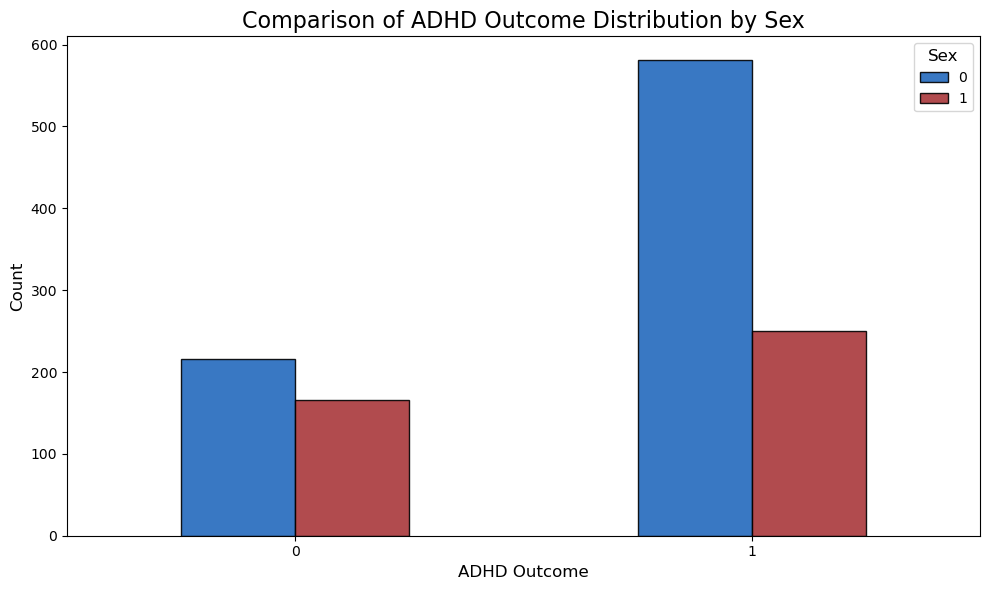

In [9]:
grouped_data = target.groupby(['Sex_F', 'ADHD_Outcome']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_data = grouped_data.pivot(index='ADHD_Outcome', columns='Sex_F', values='Count').fillna(0)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', figsize=(10, 6), colormap = 'vlag', alpha=0.9, edgecolor='black')

# Add labels, title, and legend
plt.title('Comparison of ADHD Outcome Distribution by Sex', fontsize=16)
plt.xlabel('ADHD Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Sex', fontsize=10, title_fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


### Merging Two Datasets

In [10]:
merge_df = pd.merge(cat, target, how="outer", on=["participant_id"])
merge_df

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45,1,1
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0,1,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0,1,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0,1,1
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1208,Atx7oub96GXS,2019,1,0.0,0,2,21,40,21,40,0,0
1209,groSbUfkQngM,2016,1,0.0,0,1,18,35,0,0,0,1
1210,zmxGvIrOD0bt,2015,1,1.0,2,1,18,20,0,0,0,1
1211,rOmWFuJCud5G,2018,3,0.0,8,3,21,40,18,45,0,0


## Correlation Matrix

In [11]:
def cor_matrix(data):
    ''' A function to plot the correlation matrix 
    using heatmap (only apply for numerical data)'''
    
    cor_matrix = data.corr()
    
    #create mask to hide upper triangle of the plot
    mask = np.triu(np.ones_like(cor_matrix, dtype=bool))

    #set up matplotlib figure
    plt.figure(figsize=(15,10))

    #customize the seaborn heatmap
    sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f',mask=mask, cbar_kws={'shrink':0.8})

    #set plot title
    plt.title("Correlation Matrix", fontsize=20)

    plt.show()

In [12]:
# Dropping the participant ID for correlation
df = merge_df.drop(['participant_id'], axis=1)
df

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,ADHD_Outcome,Sex_F
0,2016,1,0.0,0,1,21,45,21,45,1,1
1,2019,3,1.0,2,3,15,15,0,0,1,0
2,2016,1,1.0,8,1,18,40,0,0,1,0
3,2018,3,0.0,8,3,15,30,18,0,1,1
4,2019,3,0.0,1,3,15,20,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1208,2019,1,0.0,0,2,21,40,21,40,0,0
1209,2016,1,0.0,0,1,18,35,0,0,0,1
1210,2015,1,1.0,2,1,18,20,0,0,0,1
1211,2018,3,0.0,8,3,21,40,18,45,0,0


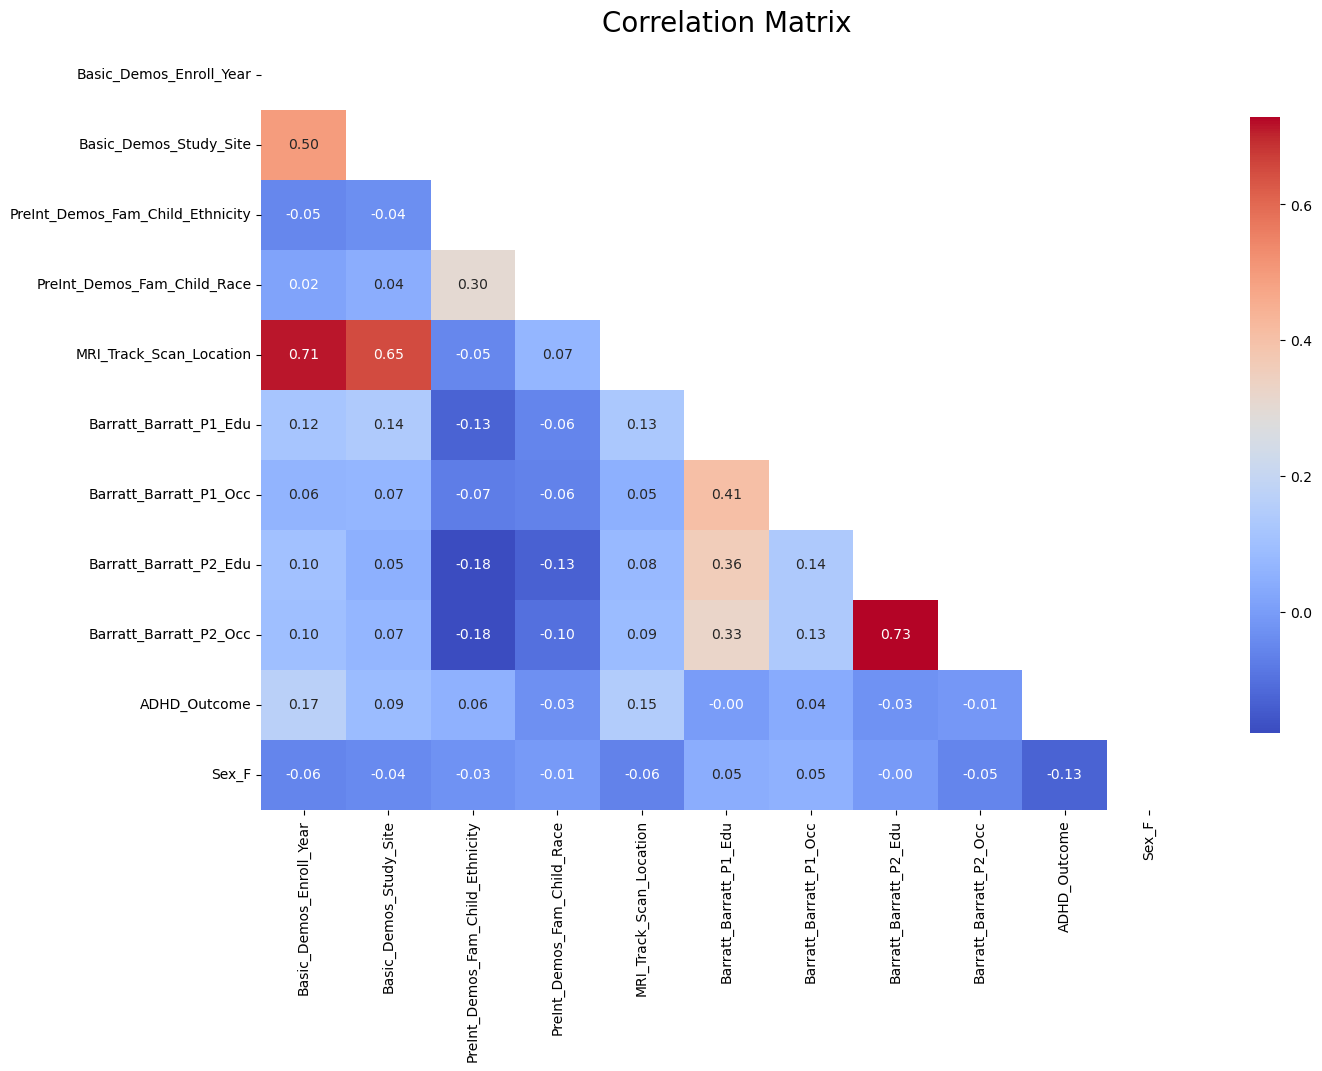

In [13]:
cor_matrix(df)

In [14]:
df.columns

Index(['Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site',
       'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'ADHD_Outcome', 'Sex_F'],
      dtype='object')

In [15]:
def EDA(var, outcome, sex, var_name):
    """
    A function to perform Exploratory Data Analysis (EDA) for a given variable.

    Parameters:
        var (pd.Series): The variable to analyze.
        outcome (pd.Series): ADHD outcome variable.
        sex (pd.Series): Sex variable.
        var_name (str): Name of the variable being analyzed.

    Outputs:
        - Statistical summary of the variable.
        - Histogram of the variable.
        - Bar plots showing relationships with ADHD outcome and sex.
        - Box plots showing distributions by ADHD outcome and sex.
    """
    # Create subplots
    fig, axes = plt.subplots(1, 5, figsize=(20,5), constrained_layout=True)

    # Statistical summary
    print(f"Statistical Summary of {var_name}:")
    print(var.describe())
    print("\n")

    # Histogram
    axes[0].hist(var, bins=10, color='#16404D', edgecolor='black')
    axes[0].set_xlabel(var_name)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Histogram of {var_name}')

    # Bar plot: Variable vs. ADHD outcome
    group1 = pd.DataFrame({'var': var, 'ADHD_outcome': outcome})
    group1 = group1.groupby(['var', 'ADHD_outcome']).size().reset_index(name='Count')
    sns.barplot(ax=axes[1], data=group1, x='var', y='Count', hue='ADHD_outcome', palette='rocket')
    axes[1].set_xlabel(var_name)
    axes[1].set_ylabel('Count')
    axes[1].set_title(f'ADHD Outcome by {var_name}')

    # Bar plot: Variable vs. Sex
    group2 = pd.DataFrame({'var': var, 'sex': sex})
    group2 = group2.groupby(['var', 'sex']).size().reset_index(name='Count')
    sns.barplot(ax=axes[2], data=group2, x='var', y='Count', hue='sex', palette='mako')
    axes[2].set_xlabel(var_name)
    axes[2].set_ylabel('Count')
    axes[2].set_title(f'Sex by {var_name}')

    # Box plot: Variable vs. ADHD outcome
    sns.boxplot(ax=axes[3], x=outcome, y=var, palette='crest')
    axes[3].set_xlabel('ADHD Outcome')
    axes[3].set_ylabel(var_name)
    axes[3].set_title(f'Distribution of {var_name} by ADHD Outcome')

    # Box plot: Variable vs. Sex
    sns.boxplot(ax=axes[4], x=sex, y=var, palette='crest')
    axes[4].set_xlabel('Sex')
    axes[4].set_ylabel(var_name)
    axes[4].set_title(f'Distribution of {var_name} by Sex')

    # Display plots
    plt.show()

    # Print value counts
    print(f"Value Counts of {var_name}:")
    print(var.value_counts())

Statistical Summary of Year of Enrollment:
count    1213.000000
mean     2017.652102
std         1.122522
min      2015.000000
25%      2017.000000
50%      2018.000000
75%      2019.000000
max      2020.000000
Name: Basic_Demos_Enroll_Year, dtype: float64




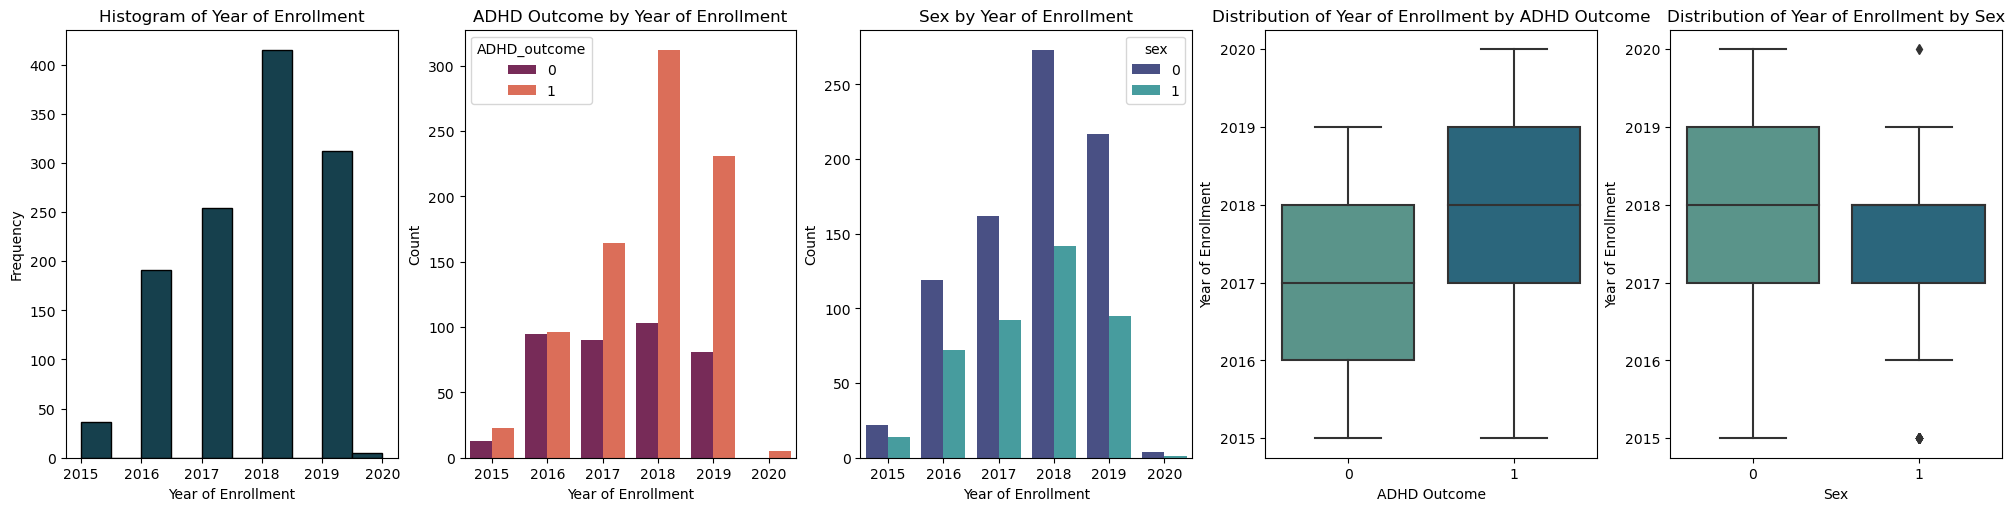

Value Counts of Year of Enrollment:
Basic_Demos_Enroll_Year
2018    415
2019    312
2017    254
2016    191
2015     36
2020      5
Name: count, dtype: int64


In [16]:
EDA(df['Basic_Demos_Enroll_Year'],df['ADHD_Outcome'],df['Sex_F'],'Year of Enrollment')

Statistical Summary of Site of Phenotypic Testing:
count    1213.000000
mean        2.014839
std         1.135147
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         4.000000
Name: Basic_Demos_Study_Site, dtype: float64




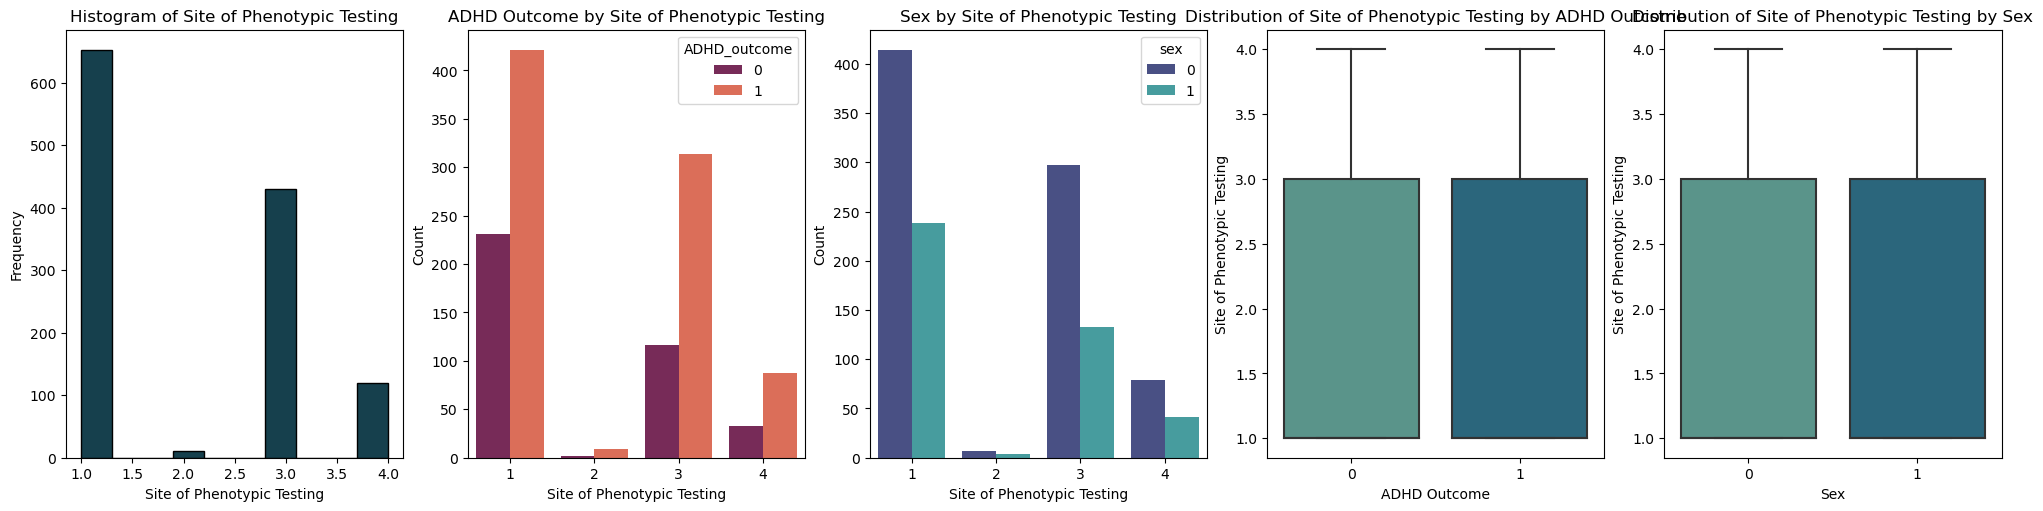

Value Counts of Site of Phenotypic Testing:
Basic_Demos_Study_Site
1    652
3    430
4    120
2     11
Name: count, dtype: int64


In [17]:
EDA(df['Basic_Demos_Study_Site'],df['ADHD_Outcome'],df['Sex_F'],'Site of Phenotypic Testing')

Statistical Summary of Ethnicity of Child:
count    1213.00000
mean        0.44765
std         0.72663
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         3.00000
Name: PreInt_Demos_Fam_Child_Ethnicity, dtype: float64




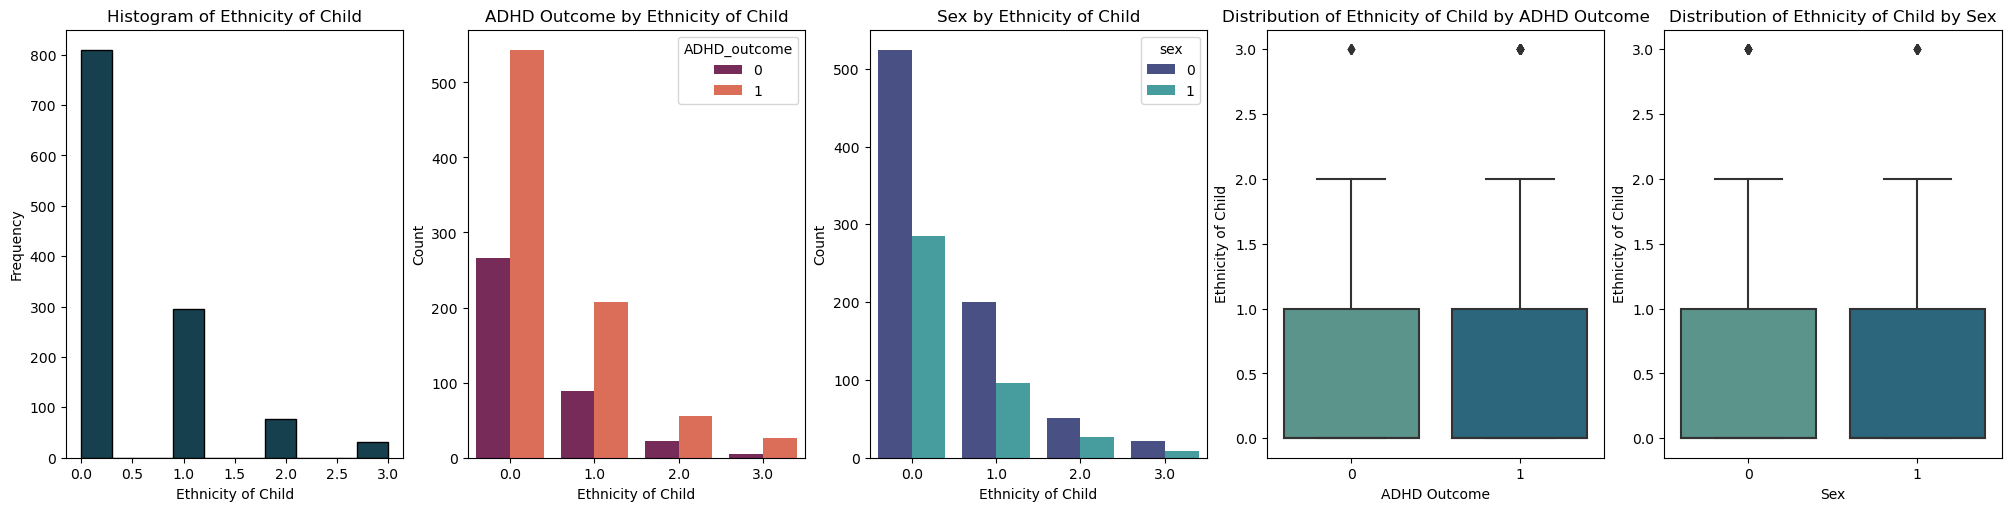

Value Counts of Ethnicity of Child:
PreInt_Demos_Fam_Child_Ethnicity
0.0    809
1.0    296
2.0     77
3.0     31
Name: count, dtype: int64


In [18]:
EDA(df['PreInt_Demos_Fam_Child_Ethnicity'],df['ADHD_Outcome'],df['Sex_F'],'Ethnicity of Child')

Statistical Summary of Race of Child:
count    1213.000000
mean        2.080791
std         3.164636
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        11.000000
Name: PreInt_Demos_Fam_Child_Race, dtype: float64




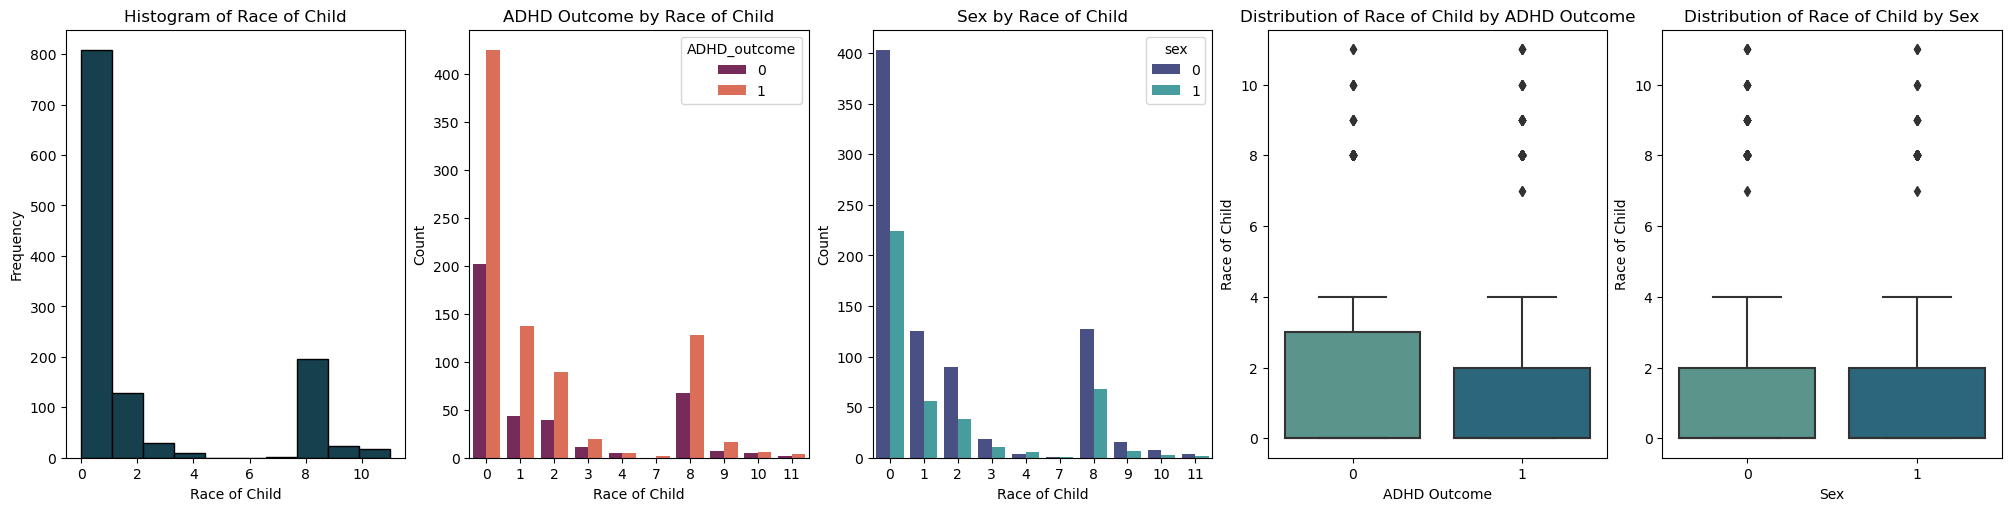

Value Counts of Race of Child:
PreInt_Demos_Fam_Child_Race
0     627
8     195
1     181
2     128
3      30
9      23
10     11
4      10
11      6
7       2
Name: count, dtype: int64


In [19]:
EDA(df['PreInt_Demos_Fam_Child_Race'],df['ADHD_Outcome'],df['Sex_F'],'Race of Child')

Statistical Summary of Scan Location:
count    1213.000000
mean        2.288541
std         0.758348
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: MRI_Track_Scan_Location, dtype: float64




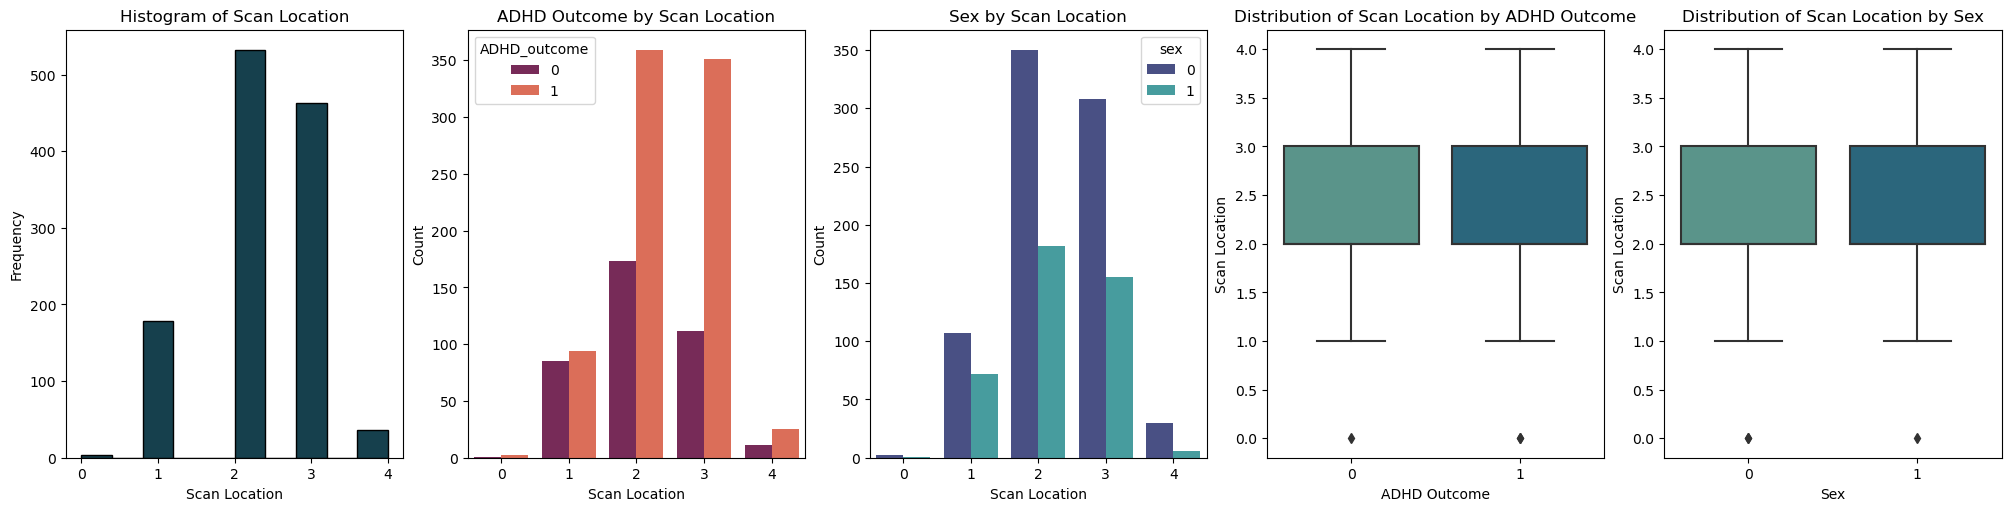

Value Counts of Scan Location:
MRI_Track_Scan_Location
2    532
3    463
1    179
4     36
0      3
Name: count, dtype: int64


In [20]:
EDA(df['MRI_Track_Scan_Location'],df['ADHD_Outcome'],df['Sex_F'],'Scan Location')

Statistical Summary of Parent 1 Education:
count    1213.000000
mean       17.641385
std         4.004639
min         0.000000
25%        15.000000
50%        18.000000
75%        21.000000
max        21.000000
Name: Barratt_Barratt_P1_Edu, dtype: float64




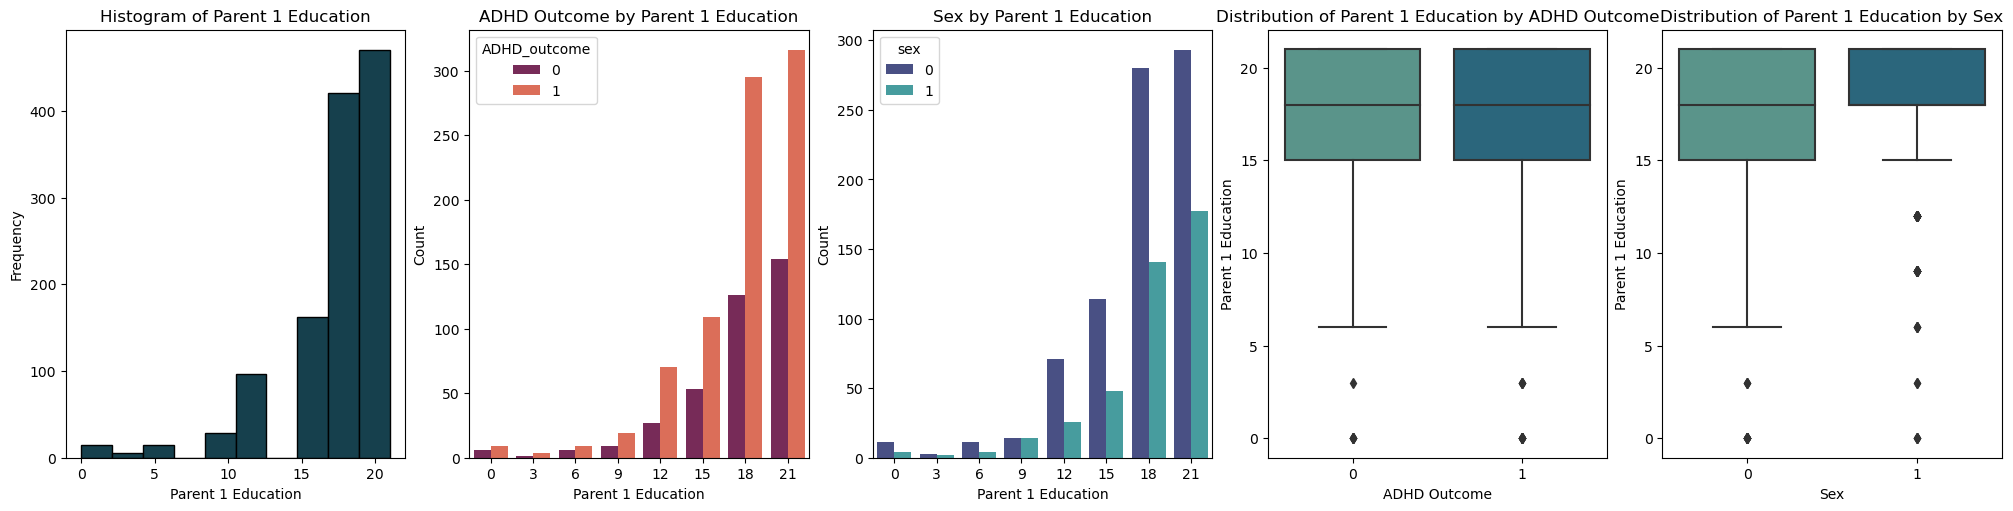

Value Counts of Parent 1 Education:
Barratt_Barratt_P1_Edu
21    470
18    421
15    162
12     97
9      28
0      15
6      15
3       5
Name: count, dtype: int64


In [21]:
EDA(df['Barratt_Barratt_P1_Edu'],df['ADHD_Outcome'],df['Sex_F'],'Parent 1 Education')

Statistical Summary of Parent 1 Occupation:
count    1213.000000
mean       24.892828
std        17.025899
min         0.000000
25%         0.000000
50%        30.000000
75%        40.000000
max        45.000000
Name: Barratt_Barratt_P1_Occ, dtype: float64




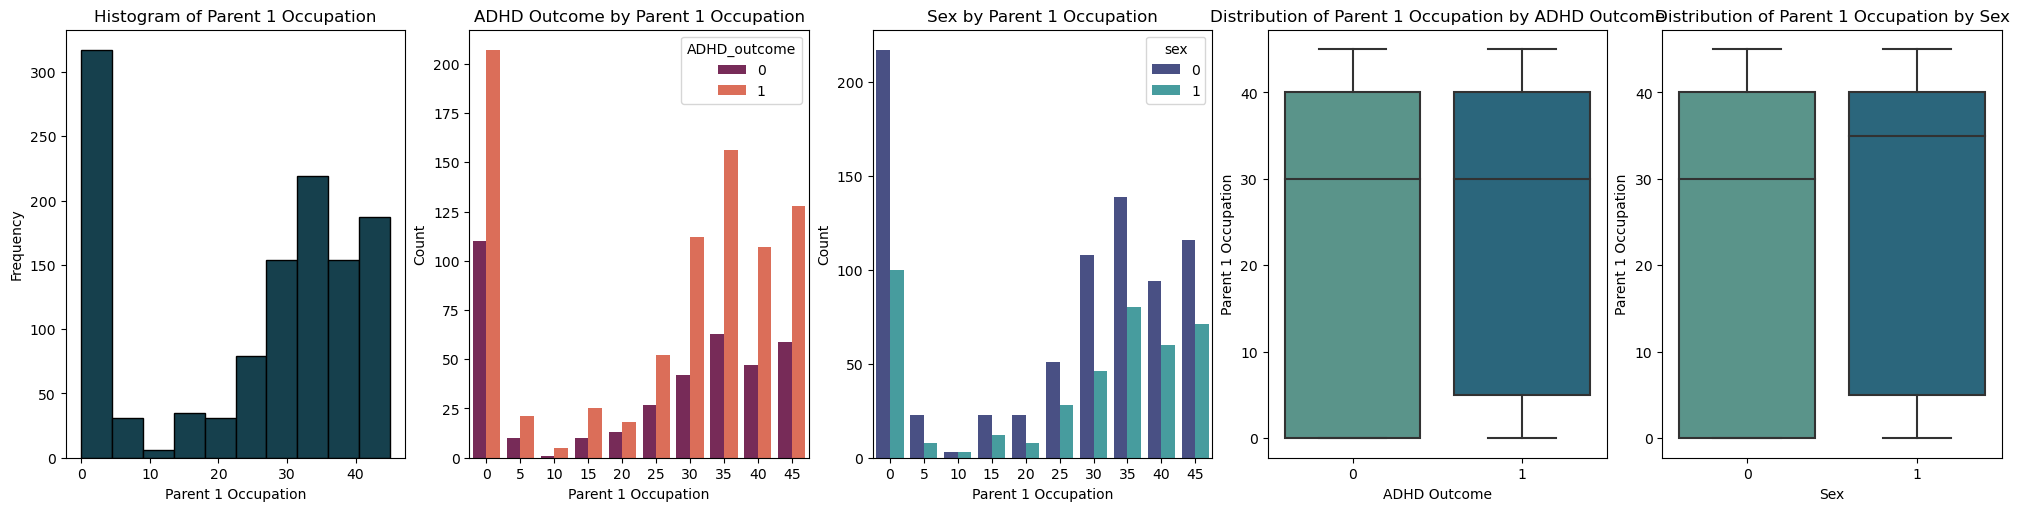

Value Counts of Parent 1 Occupation:
Barratt_Barratt_P1_Occ
0     317
35    219
45    187
40    154
30    154
25     79
15     35
20     31
5      31
10      6
Name: count, dtype: int64


In [22]:
EDA(df['Barratt_Barratt_P1_Occ'],df['ADHD_Outcome'],df['Sex_F'],'Parent 1 Occupation')

Statistical Summary of Parent 2 Education:
count    1213.000000
mean       14.122012
std         7.201023
min         0.000000
25%        12.000000
50%        18.000000
75%        21.000000
max        21.000000
Name: Barratt_Barratt_P2_Edu, dtype: float64




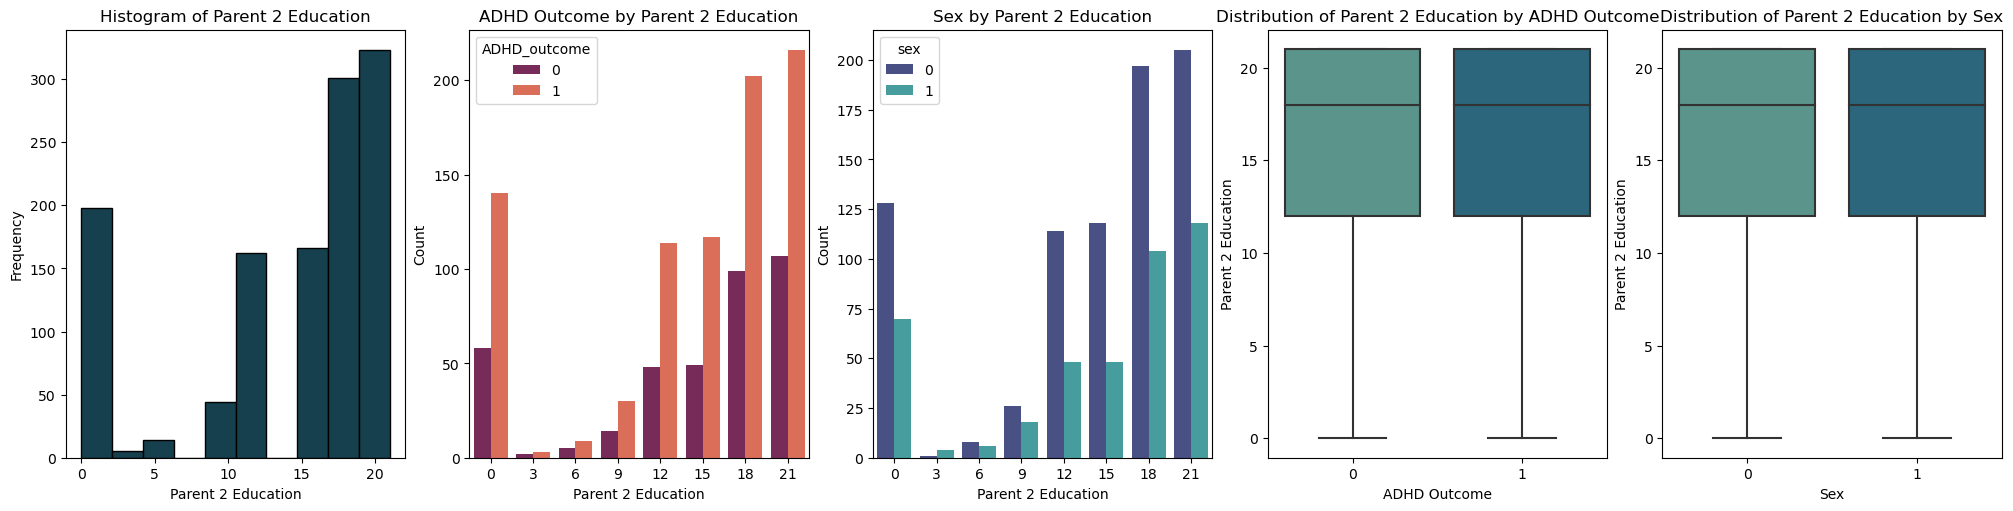

Value Counts of Parent 2 Education:
Barratt_Barratt_P2_Edu
21    323
18    301
0     198
15    166
12    162
9      44
6      14
3       5
Name: count, dtype: int64


In [23]:
EDA(df['Barratt_Barratt_P2_Edu'],df['ADHD_Outcome'],df['Sex_F'],'Parent 2 Education')

Statistical Summary of Parent 2 Occupation:
count    1213.000000
mean       24.719703
std        17.171113
min         0.000000
25%         5.000000
50%        30.000000
75%        40.000000
max        45.000000
Name: Barratt_Barratt_P2_Occ, dtype: float64




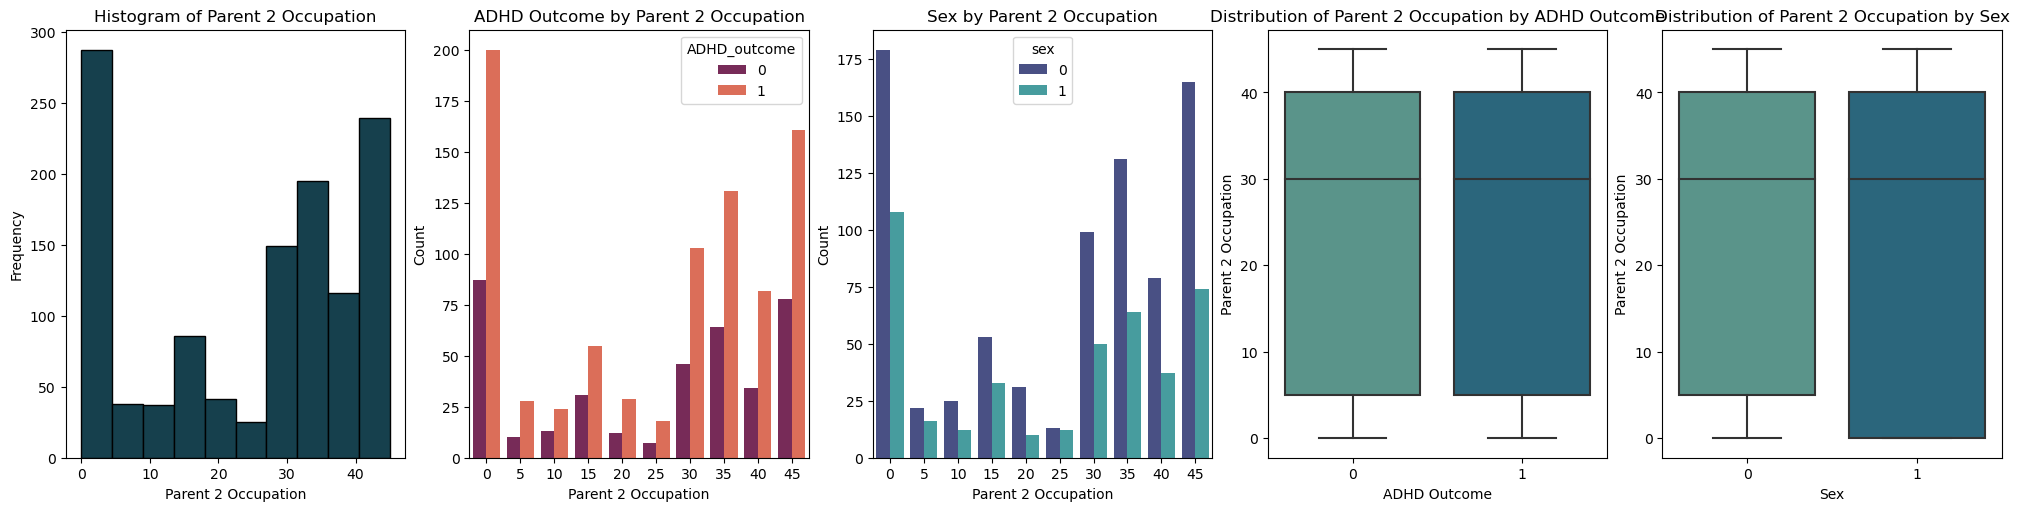

Value Counts of Parent 2 Occupation:
Barratt_Barratt_P2_Occ
0     287
45    239
35    195
30    149
40    116
15     86
20     41
5      38
10     37
25     25
Name: count, dtype: int64


In [24]:
EDA(df['Barratt_Barratt_P2_Occ'],df['ADHD_Outcome'],df['Sex_F'],'Parent 2 Occupation')